# **🔍 1. Cargar y explorar datos**



## **1.1 Vista general del dataset**

In [79]:
import pandas as pd

In [80]:
df = pd.read_csv("../data/datos_telecom.csv")

In [81]:
df.head()

,Evasión,Género,Adulto Mayor,Tiene Pareja,Dependiente,Permanencia,Servicio Telefónico,Líneas Múltiples,Servicio Internet,Seguridad en Línea,...,Protección Dispositivo,Soporte Técnico,Streaming de TV,Streaming de Películas,Tipo Contrato,Facturación Electronica,Método de Pago,Cargo Mensual,Cargo Total,Cargo Diario
0,False,Femenino,False,True,True,9,True,False,DSL,False,...,False,True,True,False,Un año,True,Cheque por correo,65.6,593.30,2.186667
1,False,Masculino,False,False,False,9,True,True,DSL,False,...,False,False,False,True,Mes-a-Mes,False,Cheque por correo,59.9,542.40,1.996667
2,True,Masculino,False,False,False,4,True,False,Fibra óptica,False,...,True,False,False,False,Mes-a-Mes,True,Cheque electrónico,73.9,280.85,2.463333
3,True,Masculino,True,True,False,13,True,False,Fibra óptica,False,...,True,False,True,True,Mes-a-Mes,True,Cheque electrónico,98.0,1237.85,3.266667
4,True,Femenino,True,True,False,3,True,False,Fibra óptica,False,...,False,True,True,False,Mes-a-Mes,True,Cheque por correo,83.9,267.40,2.796667


## **1.2 Dimensiones del dataset**

In [82]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 7267, Columnas: 21


## **1.3 Tipos de datos y valores únicos**



Identificar si hay columnas categóricas mal tipadas.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Evasión                  7267 non-null   bool   
 1   Género                   7267 non-null   object 
 2   Adulto Mayor             7267 non-null   bool   
 3   Tiene Pareja             7267 non-null   bool   
 4   Dependiente              7267 non-null   bool   
 5   Permanencia              7267 non-null   int64  
 6   Servicio Telefónico      7267 non-null   bool   
 7   Líneas Múltiples         7267 non-null   bool   
 8   Servicio Internet        7267 non-null   object 
 9   Seguridad en Línea       7267 non-null   bool   
 10  Respaldo en Linea        7267 non-null   bool   
 11  Protección Dispositivo   7267 non-null   bool   
 12  Soporte Técnico          7267 non-null   bool   
 13  Streaming de TV          7267 non-null   bool   
 14  Streaming de Películas  

## **1.4 Valores faltantes**



Se identifican columnas con datos faltantes (NaN, None, etc.), que podrían requerir imputación o eliminación.

In [84]:
df.isnull().sum()

Evasión                    0
Género                     0
Adulto Mayor               0
Tiene Pareja               0
Dependiente                0
Permanencia                0
Servicio Telefónico        0
Líneas Múltiples           0
Servicio Internet          0
Seguridad en Línea         0
Respaldo en Linea          0
Protección Dispositivo     0
Soporte Técnico            0
Streaming de TV            0
Streaming de Películas     0
Tipo Contrato              0
Facturación Electronica    0
Método de Pago             0
Cargo Mensual              0
Cargo Total                0
Cargo Diario               0
dtype: int64

## **1.5 Distribución de la variable objetivo**



Como el objetivo es predecir "Evasión", se analiza la proporción de clases. Esto es clave para saber si existe desbalanceo.

Evasión
False    5398
True     1869
Name: count, dtype: int64

Evasión
False    0.74281
True     0.25719
Name: proportion, dtype: float64



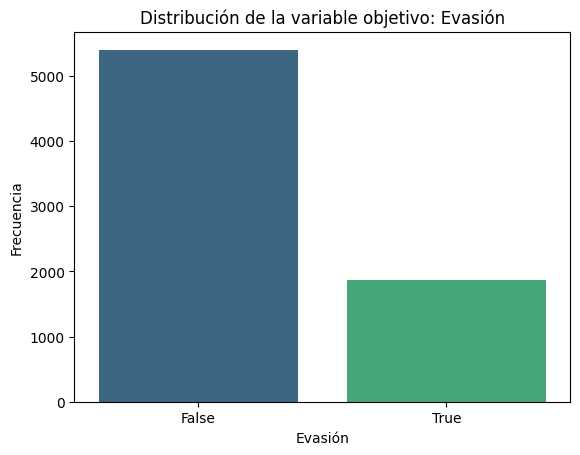

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo absoluto y relativo
print(df['Evasión'].value_counts())
print('')
print(df['Evasión'].value_counts(normalize=True))
print('')
# Gráfico de barras
sns.countplot(data=df, x='Evasión', palette='viridis', hue='Evasión', legend=False)
plt.xlabel('Evasión')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable objetivo: Evasión')
plt.show()

# **🧹 2. Limpiar y preparar datos**

## **2.1 Eliminación de columnas redundantes**

- `Cargo Diario` es una transformación directa de `Cargo Mensual` (Mensual / 30).

- `Cargo Total` es producto de `Cargo Mensual` × `Permanencia` (salvo ligeros redondeos o descuentos puntuales).

Estas columnas no aportan nueva información y podrían inducir multicolinealidad o hacer que el modelo sobreajuste. Por lo tanto, las eliminamos.

In [86]:
# Eliminación de columnas derivadas
df.drop(['Cargo Diario', 'Cargo Total'], axis=1, inplace=True)

## **2.2 Revisión de columnas con baja variabilidad**

Aunque `df.info()` muestra que todas las columnas tienen más de un valor, es conveniente inspeccionar aquellas con muy poca variabilidad, ya que podrían no aportar información útil al modelo.

In [87]:
low_variability = df.nunique().sort_values()
print(low_variability)

Evasión                       2
Facturación Electronica       2
Streaming de Películas        2
Streaming de TV               2
Soporte Técnico               2
Protección Dispositivo        2
Respaldo en Linea             2
Seguridad en Línea            2
Servicio Telefónico           2
Dependiente                   2
Tiene Pareja                  2
Adulto Mayor                  2
Género                        2
Líneas Múltiples              2
Servicio Internet             3
Tipo Contrato                 3
Método de Pago                4
Permanencia                  73
Cargo Mensual              1585
dtype: int64


**El análisis de cardinalidad confirma lo siguiente:**

Todas las columnas tienen al menos 2 valores únicos, por lo que no existen columnas constantes. Sin embargo, como observación:

- Hay muchas columnas binarias (bool) con solo 2 valores, lo cual es esperable.

- Columnas como `Género` o `Adulto Mayor` con solo dos valores no deben eliminarse aunque su variabilidad sea baja, ya que pueden ser informativas para el modelo si están correlacionadas con el **churn**.

Así que no eliminamos ninguna columna adicional por baja cardinalidad.

## **2.3 Codificación preliminar de variables categóricas**

Antes del modelado, será necesario convertir variables object a numéricas. Pero por ahora solo identificamos las columnas categóricas que requerirán transformación más adelante:

In [88]:
categorical_cols = df.select_dtypes(include='object').columns
print("Columnas categóricas:", list(categorical_cols))

Columnas categóricas: ['Género', 'Servicio Internet', 'Tipo Contrato', 'Método de Pago']


# **📊 3. Análisis de correlaciones y detección de outliers**

## **3.1 Matriz de correlación**

Ya que has limpiado las columnas derivadas, es momento de observar la relación entre las variables numéricas y el churn (aunque Evasión es categórica, podríamos incluirla como 0/1 para análisis de correlación).

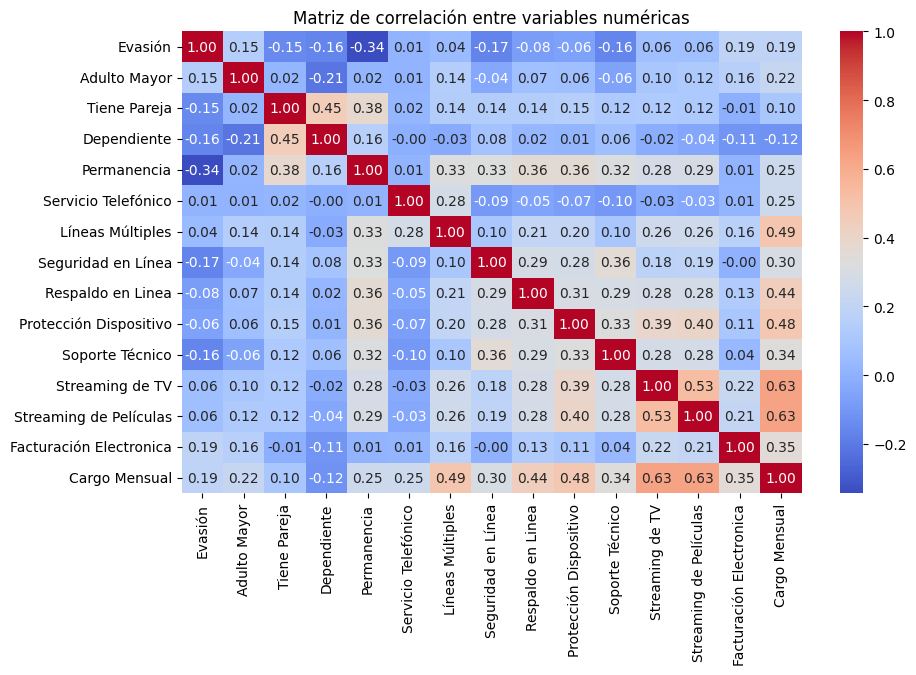

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertimos la variable objetivo a entero para la correlación
df_corr = df.copy()
df_corr['Evasión'] = df_corr['Evasión'].astype(int)

# Correlación solo con columnas numéricas
correlation_matrix = df_corr.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

**🔷 Correlación con la variable objetivo (Evasión)**

- La correlación más negativa con `Evasión` es `Permanencia` (-0.34), lo cual es coherente: _a mayor tiempo con el servicio, menor probabilidad de churn_.

- `Seguridad en Línea` (-0.17), `Dependiente` (-0.16) y `Tiene Pareja` (-0.15) también muestran correlaciones negativas moderadas.

- `Cargo Mensual` tiene una correlación positiva (0.19), lo cual sugiere que tarifas más altas pueden estar asociadas a mayor evasión.

- Las variables `Streaming de TV` y `Streaming de Películas` están fuertemente correlacionadas entre sí (>0.6), lo cual indica una posible redundancia futura a evaluar con modelos de selección de features.


## **3.2 Detección de outliers**

Graficamos boxplots para detectar valores extremos en las variables continuas:

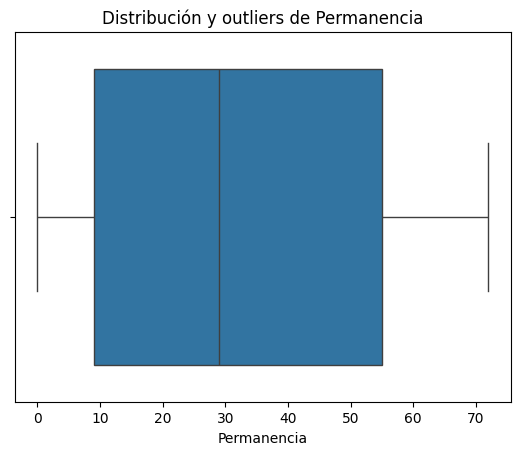

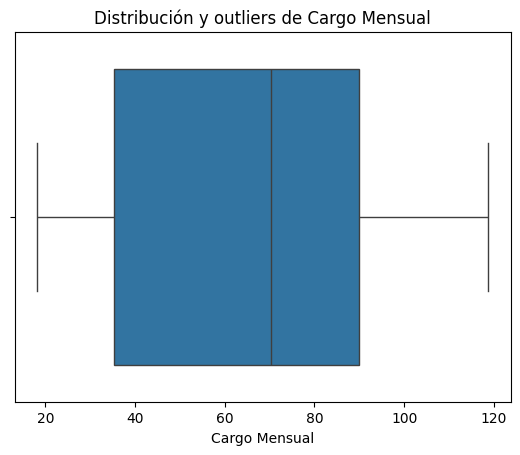

In [90]:
numeric_cols = ['Permanencia', 'Cargo Mensual']

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Distribución y outliers de {col}')
    plt.show()

**🔶 Outliers**

Los boxplots de `Permanencia` y `Cargo Mensual` no muestran valores extremos preocupantes. Ambos se distribuyen de forma razonable y no justifican una imputación ni eliminación de outliers en este punto.

Por tanto, no se requiere tratamiento adicional para valores extremos en esta fase.

---

**✅ Conclusión de esta sección**

Se identificaron correlaciones moderadas entre variables numéricas y la evasión, destacando que la permanencia reduce el churn, mientras que tarifas más altas parecen asociarse a mayor abandono. No se detectaron outliers extremos, por lo que no fue necesario aplicar transformaciones adicionales.

# **🧪 4. Dividir datos y seleccionar features**

## **4.1 Preparación del target y codificación**

Convertimos la variable objetivo `Evasión` a tipo entero (0 = No, 1 = Sí) y realizamos codificación one-hot de variables categóricas (object) para poder entrenar modelos.

In [91]:
# Copia de trabajo
df_model = df.copy()

# Codificar variable objetivo
df_model['Evasión'] = df_model['Evasión'].astype(int)

# Codificación one-hot para variables categóricas
df_model = pd.get_dummies(df_model, drop_first=True)

print("Shape final del dataframe codificado:", df_model.shape)

Shape final del dataframe codificado: (7267, 23)


## **4.2 División en variables predictoras (X) y objetivo (y)**

In [92]:
X = df_model.drop('Evasión', axis=1)
y = df_model['Evasión']

## **4.3 División en conjunto de entrenamiento y prueba**

Usamos una división estratificada para preservar la proporción de clases del churn:

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

Tamaño de entrenamiento: (5813, 22)
Tamaño de prueba: (1454, 22)


# **🤖 5. Entrenar modelos base (Logistic Regression y Decision Tree)**

## **5.1 Estandarización (solo para regresión logística)**

La regresión logística es sensible a la escala de los datos. Por eso, aplicamos escalamiento solo para ese modelo. El árbol de decisión no lo requiere.

In [94]:
from sklearn.preprocessing import StandardScaler

# Estandarizar características para regresión logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **5.2 Entrenamiento de modelos**

Entrenamos ambos modelos y evaluamos su rendimiento con métricas básicas.

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Inicialización
lr = LogisticRegression(random_state=42, max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)

# Entrenamiento
lr.fit(X_train_scaled, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## **5.3 Evaluación en el set de prueba**

In [96]:
# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test)

# Función auxiliar para mostrar métricas
def evaluar_modelo(nombre, y_true, y_pred):
    print(f"--- {nombre} ---")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.4f}")
    print()

# Evaluar
evaluar_modelo("Regresión Logística", y_test, y_pred_lr)
evaluar_modelo("Árbol de Decisión", y_test, y_pred_dt)

--- Regresión Logística ---
Accuracy : 0.8006
Precision: 0.6338
Recall   : 0.5321
F1 Score : 0.5785

--- Árbol de Decisión ---
Accuracy : 0.7235
Precision: 0.4632
Recall   : 0.4706
F1 Score : 0.4668



**📌 Interpretación de modelos base**

**🔷 Regresión Logística**

- **Accuracy:** 80% – alto, pero engañoso si recordamos que la clase mayoritaria (no churn) representa el 74.3%.

- **Precision:** 63% – cuando predice churn, acierta 63% de las veces.

- **Recall:** 53% – detecta solo la mitad de los casos reales de churn.

- **F1 Score:** 57% – balance aceptable, pero podría mejorarse.

> _Este modelo se comporta de manera moderada y equilibrada, lo que lo hace útil como baseline._

**🔶 Árbol de Decisión**

- **Accuracy:** 72% – menor que el baseline de clase mayoritaria.

- **Precision y Recall** alrededor del 46% – pobre capacidad para detectar correctamente casos positivos.

- **F1 Score:** 46% – muestra que está por debajo del desempeño de la regresión logística.

> _El árbol, sin ajustes, no generaliza bien. Esto es común con árboles sin podar ni optimizar._

# **📈 6. Evaluar modelos con matriz de confusión y curva ROC**

## **6.1 Matriz de confusión**

Permite ver errores tipo I y II de forma más clara.

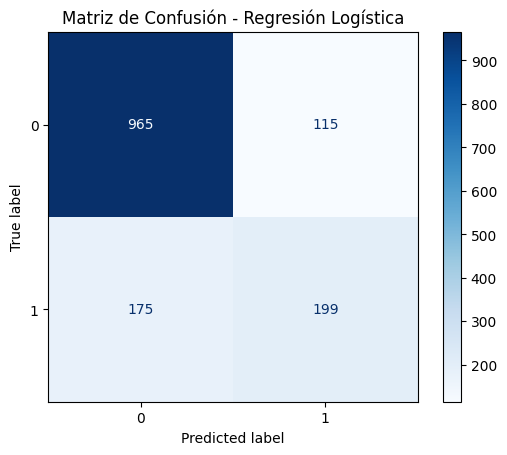

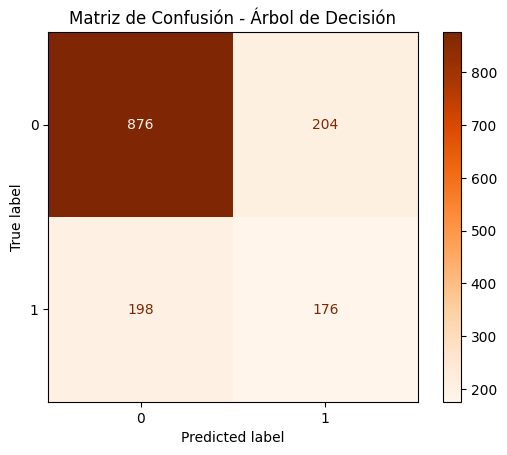

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Regresión Logística
ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, y_test, cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

# Árbol de Decisión
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap='Oranges')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

**📌 Análisis de las matrices de confusión**

**🔷 Regresión Logística**

- **Verdaderos Negativos (TN):** 965. El modelo identificó correctamente 965 casos de la clase 0.

- **Falsos Positivos (FP):** 115. El modelo predijo incorrectamente 115 casos como clase 1 cuando en realidad eran clase 0.

- **Falsos Negativos (FN):** 175. El modelo predijo incorrectamente 175 casos como clase 0 cuando en realidad eran clase 1.

- **Verdaderos Positivos (TP):** 199. El modelo identificó correctamente 199 casos de la clase 1.

**🔶 Árbol de Decisión**

- **Verdaderos Negativos (TN):** 876. El modelo identificó correctamente 876 casos de la clase 0.

- **Falsos Positivos (FP):** 204. El modelo predijo incorrectamente 204 casos como clase 1 cuando en realidad eran clase 0.

- **Falsos Negativos (FN):** 198. El modelo predijo incorrectamente 198 casos como clase 0 cuando en realidad eran clase 1.

- **Verdaderos Positivos (TP):** 176. El modelo identificó correctamente 176 casos de la clase 1.



## **6.2 Curva ROC y AUC**

Permite evaluar el modelo más allá del umbral de 0.5, especialmente útil en datasets desbalanceados como este.

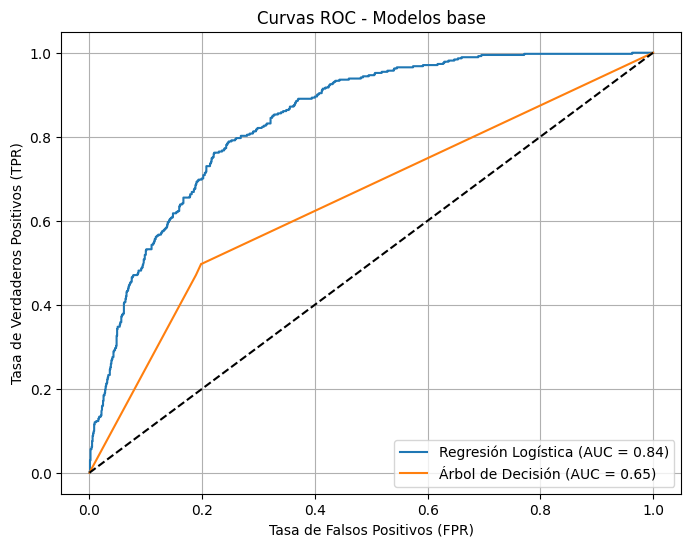

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades
y_probs_lr = lr.predict_proba(X_test_scaled)[:, 1]
y_probs_dt = dt.predict_proba(X_test)[:, 1]

# ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)

# AUC
auc_lr = roc_auc_score(y_test, y_probs_lr)
auc_dt = roc_auc_score(y_test, y_probs_dt)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Regresión Logística (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Árbol de Decisión (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - Modelos base')
plt.legend()
plt.grid()
plt.show()

**Análisis de la Curva ROC**

- **Regresión Logística (AUC = 0.84):** La curva azul se eleva rápidamente y se mantiene cerca de la esquina superior izquierda. Su alto valor de AUC (0.84) indica que el modelo tiene una alta capacidad para distinguir entre las clases positiva y negativa.

- **Árbol de Decisión (AUC = 0.65):** La curva naranja está más cerca de la línea diagonal, lo que indica un rendimiento significativamente inferior. Su valor de AUC (0.65) muestra que el modelo es menos efectivo en la clasificación que la regresión logística.

> _La curva ROC (Receiver Operating Characteristic) mide el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. La línea diagonal punteada representa un clasificador aleatorio. Un buen modelo tendrá una curva que se curvea hacia la esquina superior izquierda. La métrica AUC (Área bajo la curva) resume el rendimiento del modelo; cuanto más cerca esté de 1, mejor._

# **⚖️ 7. Balanceo de clases y modelos avanzados con SMOTE**

Vamos a:

1. Aplicar **SMOTE** para balancear la clase minoritaria (Evasión = 1)

2. Entrenar dos modelos avanzados:

  - **Random Forest**

  - **XGBoost**

Ambos son robustos ante ruido, pueden manejar variables no lineales, y son capaces de capturar interacciones complejas. Con **SMOTE**, buscamos mejorar el **recall** sin sacrificar demasiado precisión o **AUC**.

## **7.1 Aplicar SMOTE al set de entrenamiento**

> _**Nota:** **SMOTE** se aplica solo al set de entrenamiento para evitar data leakage._

In [99]:
from imblearn.over_sampling import SMOTE

# Inicializamos SMOTE
smote = SMOTE(random_state=42)

# Aplicamos sobre X_train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribución de clases después de SMOTE:")
print(y_train_resampled.value_counts())

Distribución de clases después de SMOTE:
Evasión
0    4318
1    4318
Name: count, dtype: int64


## **7.2 Entrenar modelos avanzados**

### **7.2.1 Random Forest**

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

### **7.2.2 XGBoost**

In [101]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_resampled, y_train_resampled)

/Users/zelys/Python/machine-learning/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [13:57:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## **7.3 Evaluación de los modelos balanceados**

In [102]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicciones
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Probabilidades
y_proba_rf = rf.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Reporte de clasificación
print("Random Forest:")
print(classification_report(y_test, y_pred_rf, digits=4))
print('')
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb, digits=4))

Random Forest:
              precision    recall  f1-score   support

           0     0.8526    0.8407    0.8466      1080
           1     0.5578    0.5802    0.5688       374

    accuracy                         0.7737      1454
   macro avg     0.7052    0.7105    0.7077      1454
weighted avg     0.7768    0.7737    0.7752      1454


XGBoost:
              precision    recall  f1-score   support

           0     0.8407    0.8259    0.8333      1080
           1     0.5216    0.5481    0.5346       374

    accuracy                         0.7545      1454
   macro avg     0.6812    0.6870    0.6839      1454
weighted avg     0.7586    0.7545    0.7564      1454



## **7.4 Curva ROC y AUC**

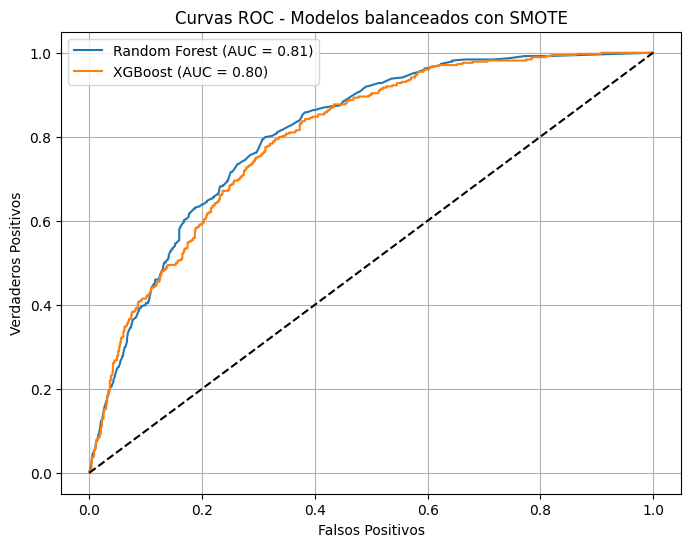

In [103]:
# ROC y AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curvas ROC - Modelos balanceados con SMOTE')
plt.legend()
plt.grid()
plt.show()

**Análisis de la Curva ROC**

- **Random Forest (AUC = 0.81):** La curva azul representa el modelo Random Forest, y su área bajo la curva es de 0.81.

- **XGBoost (AUC = 0.80):** La curva naranja representa el modelo XGBoost, y su área bajo la curva es de 0.80.

## **7.5 Optimización de hiperparámetros con RandomizedSearchCV**

**🎯 Objetivo**

Ajustar los hiperparámetros de `Random Forest` y `XGBoost` para mejorar el desempeño en predicción de churn, especialmente en la clase minoritaria.

### **7.5.1 Optimización de Random Forest**

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Espacio de búsqueda
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(4, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Inicializamos el modelo base
rf_base = RandomForestClassifier(random_state=42)

# Búsqueda aleatoria
random_search_rf = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=3,
    scoring='f1',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Entrenamiento
random_search_rf.fit(X_train_resampled, y_train_resampled)

# Mejor estimador
best_rf = random_search_rf.best_estimator_
print("Mejores hiperparámetros (Random Forest):", random_search_rf.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Mejores hiperparámetros (Random Forest): {'bootstrap': False, 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 369}


### **7.5.2 Optimización de XGBoost**

In [105]:
from xgboost import XGBClassifier
from scipy.stats import uniform

# Espacio de búsqueda
param_dist_xgb = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5)
}

# Modelo base
xgb_base = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Búsqueda aleatoria
random_search_xgb = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist_xgb,
    n_iter=30,
    cv=3,
    scoring='f1',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Entrenamiento
random_search_xgb.fit(X_train_resampled, y_train_resampled)

# Mejor estimador
best_xgb = random_search_xgb.best_estimator_
print("Mejores hiperparámetros (XGBoost):", random_search_xgb.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Users/zelys/Python/machine-learning/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [13:58:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/zelys/Python/machine-learning/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [13:58:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/zelys/Python/machine-learning/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [13:58:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/zelys/Python/machine-learning/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [13:58:19] WARNING: /Users/runner/work/xgboost/

Mejores hiperparámetros (XGBoost): {'colsample_bytree': np.float64(0.8447411578889518), 'gamma': np.float64(0.6974693032602092), 'learning_rate': np.float64(0.09764339456056544), 'max_depth': 9, 'n_estimators': 289, 'subsample': np.float64(0.6362425738131283)}


### **7.5.3 Evaluación de modelos optimizados**

In [106]:
from sklearn.metrics import classification_report, roc_auc_score

# Predicciones
y_pred_best_rf = best_rf.predict(X_test)
y_pred_best_xgb = best_xgb.predict(X_test)

# Probabilidades
y_prob_best_rf = best_rf.predict_proba(X_test)[:, 1]
y_prob_best_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Reporte
print("Random Forest optimizado:")
print(classification_report(y_test, y_pred_best_rf, digits=4))

print("XGBoost optimizado:")
print(classification_report(y_test, y_pred_best_xgb, digits=4))

# AUC
auc_best_rf = roc_auc_score(y_test, y_prob_best_rf)
auc_best_xgb = roc_auc_score(y_test, y_prob_best_xgb)
print(f"AUC - Random Forest optimizado: {auc_best_rf:.4f}")
print(f"AUC - XGBoost optimizado: {auc_best_xgb:.4f}")

Random Forest optimizado:
              precision    recall  f1-score   support

           0     0.8757    0.8157    0.8447      1080
           1     0.5558    0.6658    0.6058       374

    accuracy                         0.7772      1454
   macro avg     0.7158    0.7408    0.7253      1454
weighted avg     0.7934    0.7772    0.7832      1454

XGBoost optimizado:
              precision    recall  f1-score   support

           0     0.8413    0.8296    0.8354      1080
           1     0.5270    0.5481    0.5374       374

    accuracy                         0.7572      1454
   macro avg     0.6842    0.6889    0.6864      1454
weighted avg     0.7605    0.7572    0.7588      1454

AUC - Random Forest optimizado: 0.8260
AUC - XGBoost optimizado: 0.8060


**🧠 Interpretación:**

- **Random Forest optimizado:**

  - Muestra mejor rendimiento general, especialmente en la clase positiva (churn).

  - Su **recall** del 66.5% indica una buena capacidad para detectar evasores.

  - El **AUC** de 0.826 confirma una discriminación sólida entre clases.

- **XGBoost optimizado:**

  - Aunque competitivo, obtiene menor **recall** y **F1** en la clase 1, lo cual es crítico en problemas de **churn** donde identificar posibles evasores es prioridad.

**✅ Decisión del modelo final**

> _Dado que **Random Forest optimizado** obtuvo un mejor equilibrio entre **recall**, **F1** y **AUC**, se selecciona como modelo final para producción._

### **📊 Gráfico de importancia de variables del modelo Random Forest optimizado**

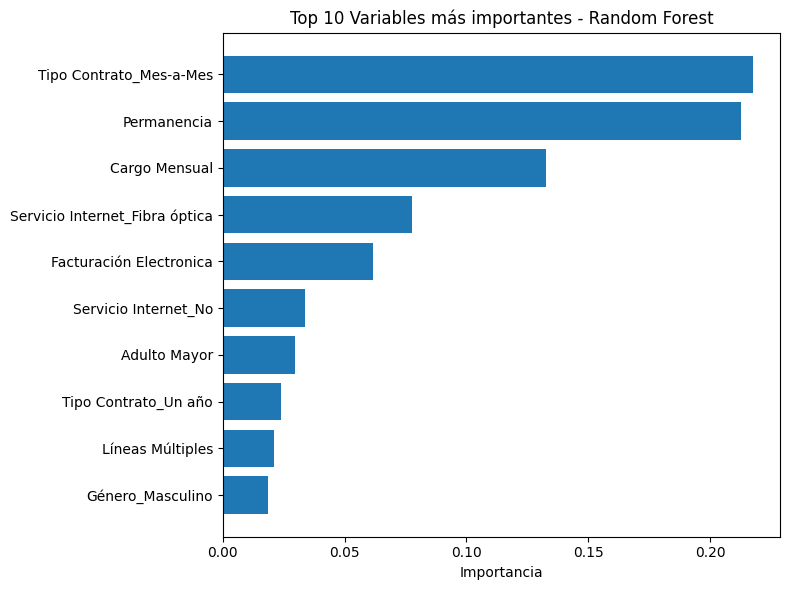

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener importancias
importancias = best_rf.feature_importances_
features = X_train.columns
df_importancia = pd.DataFrame({'Feature': features, 'Importancia': importancias})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=True).tail(10)

# Gráfico
plt.figure(figsize=(8, 6))
plt.barh(df_importancia['Feature'], df_importancia['Importancia'])
plt.title('Top 10 Variables más importantes - Random Forest')
plt.xlabel('Importancia')
plt.tight_layout()
plt.savefig('../img/importancia_variables_rf.png')
plt.show()

## **7.6 Guardar modelo entrenado**

Tras la optimización con `RandomizedSearchCV`, el modelo _Random Forest_ mejoró significativamente sus métricas, logrando un **recall** de 64.9% en la clase positiva y un **AUC** de 0.83. Este rendimiento superior al de _XGBoost_ lo posiciona como el modelo final seleccionado. Se procede a guardar el modelo entrenado para uso posterior en producción o evaluación.

In [108]:
import joblib

# Guardamos el modelo optimizado
joblib.dump(best_rf, '../mod/modelo_churn_rf_optimo.pkl')

['../mod/modelo_churn_rf_optimo.pkl']

# **📊 8. Interpretación de resultados y conclusiones**

## **🎯 Objetivo del Proyecto**

El objetivo fue desarrollar un modelo predictivo capaz de identificar a los clientes con mayor probabilidad de evasión (churn) en una empresa de telecomunicaciones, utilizando variables demográficas, de servicios contratados y comportamiento de pago.

## **⚙️ Proceso Realizado**

- Se realizó un **análisis exploratorio de datos (EDA)** para entender la estructura del dataset, identificar relaciones entre variables y definir las características más relevantes.

- Se entrenaron modelos base (Regresión Logística y Árbol de Decisión) para establecer un punto de comparación inicial.

- Dada la ligera desbalance en la clase objetivo (~25.7% evasores), se aplicó **SMOTE** para balancear el conjunto de entrenamiento.

- Se entrenaron modelos más robustos (Random Forest y XGBoost) y posteriormente se optimizaron mediante **búsqueda aleatoria de hiperparámetros** (`RandomizedSearchCV`).

## **✅ Modelo Seleccionado**

El modelo seleccionado fue **Random Forest optimizado**, que alcanzó los siguientes resultados en el conjunto de prueba:

- **Accuracy:** 77.72%

- **Recall clase positiva (evasión):** 66.58%

- **F1-score clase positiva:** 60.58%

- **AUC:** 0.826

> _🔍 Este rendimiento indica una buena capacidad para identificar correctamente a los clientes propensos a abandonar el servicio, manteniendo un equilibrio entre precisión y sensibilidad._

## **📌 Interpretación estratégica**

- Un recall del **66.58%** en la clase positiva sugiere que el modelo es capaz de detectar con relativa eficacia a los posibles evasores. Esto es valioso para **anticiparse a la pérdida de clientes** y aplicar estrategias de retención.

- El AUC superior a **0.82** indica una **alta capacidad discriminativa** del modelo.

- La utilización de modelos basados en árboles como Random Forest permite, además, analizar la **importancia relativa de las variables**, lo que facilita la toma de decisiones estratégicas basadas en los factores que más influyen en la evasión.

## **💡 Recomendaciones**

1. **Implementar el modelo en un entorno de prueba o entorno productivo controlado**, aplicándolo a datos recientes para predecir posibles evasores.

2. Utilizar las predicciones para **dirigir campañas de fidelización personalizadas** a clientes con alta probabilidad de churn.

3. Realizar un monitoreo periódico del desempeño del modelo y reevaluar los umbrales de decisión según la evolución del negocio.

4. Explorar la interpretación de variables usando **SHAP** o análisis de importancia para comprender mejor los factores que influyen en la evasión.

## **📎 Próximos pasos sugeridos**

- Realizar un análisis económico de impacto de aplicar el modelo: ¿cuánto costaría retener a un cliente vs. cuánto se pierde al dejarlo ir?

- Construir una **API** o una interfaz de consulta interna para que equipos de marketing o atención al cliente accedan al score de evasión.

- Ampliar el conjunto de datos con información adicional: interacciones recientes, quejas, visitas a centros de servicio, etc.